In [1]:
import pandas as pd
import scanpy as sc
import h5py
import anndata
import numpy as np
import CococoNet_reader
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations

In [2]:
arab_cococonet = CococoNet_reader.read_cococonet('arabidopsis')

In [3]:
arab_cococonet_1_set_to_zero = arab_cococonet.replace(1,0)
arab_cococonet_1_set_to_zero

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,0.000000,0.676041,0.885107,0.916603,0.167027,0.625596,0.801175,0.866369,0.954286,0.715750,...,0.111731,0.193853,0.261697,0.299060,0.321617,0.287853,0.559907,0.017205,0.011806,0.091015
AT1G01030,0.676041,0.000000,0.707718,0.515532,0.420354,0.292083,0.687003,0.626281,0.483536,0.570675,...,0.245167,0.215414,0.255414,0.306986,0.308402,0.270118,0.463394,0.083490,0.059014,0.108780
AT1G01040,0.885107,0.707718,0.000000,0.836387,0.545101,0.701558,0.656258,0.857046,0.657204,0.650843,...,0.155183,0.230038,0.149740,0.334558,0.287951,0.186425,0.219380,0.032348,0.018332,0.057761
AT1G01050,0.916603,0.515532,0.836387,0.000000,0.562112,0.726964,0.837948,0.928252,0.952045,0.640223,...,0.089440,0.177388,0.164935,0.236661,0.251851,0.213062,0.412583,0.046082,0.029016,0.086736
AT1G01060,0.167027,0.420354,0.545101,0.562112,0.000000,0.327202,0.242215,0.304953,0.217415,0.077569,...,0.082518,0.125455,0.103488,0.187982,0.195059,0.125488,0.212731,0.061676,0.057518,0.044208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0.287853,0.270118,0.186425,0.213062,0.125488,0.083681,0.364707,0.333718,0.237716,0.149145,...,0.858389,0.905572,0.926062,0.941864,0.954421,0.000000,0.969018,0.450607,0.357960,0.410586
ATCG01130,0.559907,0.463394,0.219380,0.412583,0.212731,0.077222,0.625678,0.496059,0.428496,0.226147,...,0.881835,0.936241,0.946935,0.958553,0.960399,0.969018,0.000000,0.467233,0.412343,0.483002
ATCG01180,0.017205,0.083490,0.032348,0.046082,0.061676,0.022381,0.090228,0.069825,0.028903,0.015799,...,0.751869,0.781811,0.740045,0.745181,0.676666,0.450607,0.467233,0.000000,0.999090,0.579657
ATCG01210,0.011806,0.059014,0.018332,0.029016,0.057518,0.026014,0.062831,0.043944,0.015468,0.018706,...,0.687306,0.710940,0.676507,0.687223,0.567304,0.357960,0.412343,0.999090,0.000000,0.511263


In [4]:
top_10_arab_genes = np.array(
    [arab_cococonet_1_set_to_zero[c].nlargest(10).index.values for c in arab_cococonet_1_set_to_zero]
)  # using pair list above, cut down top 10 list to relevant genes, probably by adding list as a column in panda and then filtering panda to index of pair list
top_10_arab_genes_dataframe = pd.DataFrame(
    data=top_10_arab_genes,
    index=arab_cococonet_1_set_to_zero.index,
    columns=[
        "One",
        "Two",
        "Three",
        "Four",
        "Five",
        "Six",
        "Seven",
        "Eight",
        "Nine",
        "Ten",
    ],
)
top_10_arab_genes_dataframe

,One,Two,Three,Four,Five,Six,Seven,Eight,Nine,Ten
AT1G01020,AT1G30590,AT3G15010,AT3G54480,AT2G48100,AT5G02770,AT3G26920,AT5G66240,AT5G59460,AT5G67610,AT2G45640
AT1G01030,AT1G31650,AT3G11170,AT5G50860,AT2G46810,AT5G67260,AT2G13440,AT2G43950,AT2G28540,AT2G45950,AT3G09670
AT1G01040,AT4G00060,AT3G54230,AT5G35210,AT1G55325,AT1G73960,AT2G29210,AT4G16310,AT5G22760,AT2G27980,AT1G79350
AT1G01050,AT2G42210,AT2G17390,AT5G36230,AT4G02580,AT3G14290,AT5G40810,AT1G09150,AT5G10460,AT5G66510,AT4G06599
AT1G01060,AT3G09600,AT2G46830,AT5G64940,AT4G38960,AT3G12320,AT3G54500,AT4G15430,AT2G31380,AT5G15950,AT3G01060
...,...,...,...,...,...,...,...,...,...,...
ATCG01120,ATCG01130,ATCG01110,ATCG00800,ATCG00740,ATCG01100,ATCG00770,ATCG00650,ATCG01010,ATCG00660,ATCG01090
ATCG01130,ATCG00800,ATCG00790,ATCG00740,ATCG00810,ATCG00650,ATCG00780,ATCG00150,ATCG00770,ATCG00040,ATCG00530
ATCG01180,ATCG00950,ATCG01210,ATCG00920,ATCG00020,ATCG00490,ATCG00680,ENSRNA049495549,ATCG00350,ATCG00720,ATCG00340
ATCG01210,ATCG01180,ATCG00950,ATCG00920,ATCG00490,ENSRNA049495549,ATCG00020,ATCG00680,ATCG00350,ATCG00280,ATCG00340


In [5]:
tidy_top_10 = top_10_arab_genes_dataframe.melt(ignore_index= False)
tidy_top_10
zipped_pairs = zip(tuple(tidy_top_10.index.to_list()),tuple(tidy_top_10['value'].to_list()))

In [6]:
binary_masked_cococonet = pd.DataFrame(data = 0, columns = arab_cococonet.columns, index = arab_cococonet.index)
#binary_masked_cococonet.loc[zip(tuple(tidy_top_10.index.to_list()),tuple(tidy_top_10['value'].to_list()))] = 1
#binary_masked_cococonet.sum(axis =0)
for row,column in zipped_pairs:
    binary_masked_cococonet.at[row,column] = 1
binary_masked_cococonet

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01030,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01050,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AT1G01060,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0,0,0,0,0,0,0,0,0,0,...,0,0,1,1,1,0,1,0,0,0
ATCG01130,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ATCG01180,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
ATCG01210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
ranked_columns_cococonet = arab_cococonet_1_set_to_zero.rank()
ranked_columns_cococonet

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,1.0,19613.0,16301.0,16662.0,10398.0,16067.0,16385.0,15559.0,19078.0,17115.0,...,15836.0,17411.0,19327.0,18170.0,19393.0,19923.0,20465.0,9647.0,8750.0,16876.0
AT1G01030,8761.0,1.0,10054.0,4915.0,18912.0,5101.0,13059.0,8258.0,6841.0,11922.0,...,20305.0,18191.0,19221.0,18392.0,19070.0,19477.0,19410.0,18431.0,18227.0,17986.0
AT1G01040,15837.0,20260.0,1.0,12516.0,20006.0,18717.0,12209.0,15125.0,10507.0,14760.0,...,18311.0,18627.0,14960.0,19026.0,18501.0,15271.0,10720.0,14046.0,12006.0,12286.0
AT1G01050,17513.0,13479.0,14421.0,1.0,20113.0,19475.0,17388.0,18521.0,19016.0,14385.0,...,13704.0,16605.0,16019.0,15844.0,17125.0,16993.0,18302.0,15978.0,14939.0,16522.0
AT1G01060,1061.0,9642.0,6470.0,5598.0,1.0,6060.0,4102.0,3500.0,2546.0,1273.0,...,12914.0,12780.0,10325.0,13022.0,14097.0,10186.0,10366.0,17280.0,18107.0,9080.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,2524.0,5414.0,1374.0,1136.0,8078.0,819.0,5904.0,3898.0,2833.0,2326.0,...,20816.0,20814.0,20832.0,20822.0,20850.0,1.0,20866.0,20771.0,20768.0,20809.0
ATCG01130,6537.0,11291.0,1801.0,3401.0,12757.0,719.0,11419.0,6108.0,5855.0,3634.0,...,20830.0,20833.0,20846.0,20834.0,20858.0,20879.0,1.0,20775.0,20778.0,20844.0
ATCG01180,40.0,1338.0,42.0,61.0,4293.0,109.0,1959.0,739.0,206.0,374.0,...,20797.0,20797.0,20795.0,20790.0,20792.0,20782.0,19472.0,1.0,20879.0,20873.0
ATCG01210,26.0,769.0,18.0,22.0,4019.0,139.0,1483.0,496.0,96.0,415.0,...,20792.0,20788.0,20787.0,20779.0,20778.0,20671.0,18293.0,20878.0,1.0,20860.0


In [8]:
ranked_columns_cococonet.sum(axis = 1)

AT1G01020    311475415.0
AT1G01030    157556588.0
AT1G01040    304261660.0
AT1G01050    337602461.0
AT1G01060     72540424.0
                ...     
ATCG01120     45841333.0
ATCG01130     80126213.0
ATCG01180     19750802.0
ATCG01210     16992829.0
ATCG01310     25047972.0
Length: 20879, dtype: float64

In [9]:
dot_product_cococonet = binary_masked_cococonet.dot(ranked_columns_cococonet)

In [10]:
subtract_minimum = dot_product_cococonet-65 # This is 11+10+9+8+7+6+5+4+3+2
subtract_minimum

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,208680.0,176180.0,185739.0,187173.0,125884.0,170923.0,155527.0,166523.0,187956.0,182540.0,...,116094.0,140149.0,148434.0,149027.0,155250.0,166779.0,171395.0,85583.0,73048.0,122589.0
AT1G01030,148953.0,208680.0,152892.0,155316.0,194126.0,93495.0,190789.0,176558.0,142823.0,125016.0,...,196527.0,198465.0,200808.0,201173.0,202585.0,197346.0,198597.0,175512.0,164357.0,188518.0
AT1G01040,175725.0,194100.0,208680.0,156815.0,185277.0,176800.0,136356.0,176026.0,118214.0,166584.0,...,178412.0,179377.0,161152.0,187786.0,187269.0,147635.0,124187.0,123266.0,96951.0,124388.0
AT1G01050,197210.0,145452.0,157486.0,208680.0,156471.0,169853.0,179658.0,196644.0,198576.0,163158.0,...,96257.0,126125.0,137239.0,138213.0,149667.0,171806.0,179039.0,107787.0,96482.0,149529.0
AT1G01060,34409.0,135159.0,73268.0,66212.0,208680.0,88455.0,76307.0,58290.0,37856.0,22635.0,...,139426.0,131295.0,122000.0,135071.0,135086.0,117037.0,114126.0,162089.0,167106.0,126119.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,40037.0,91874.0,28435.0,22250.0,114654.0,7195.0,91406.0,57002.0,26816.0,32147.0,...,208461.0,208481.0,187681.0,187633.0,187748.0,208680.0,187742.0,208005.0,207977.0,208360.0
ATCG01130,51648.0,124061.0,37468.0,31752.0,124584.0,8210.0,124369.0,73139.0,41105.0,43143.0,...,208316.0,208351.0,208444.0,208438.0,208513.0,208609.0,208680.0,207926.0,207901.0,208468.0
ATCG01180,4747.0,28961.0,7426.0,4052.0,62440.0,2482.0,40623.0,20543.0,2782.0,7432.0,...,208279.0,208228.0,208189.0,208198.0,208029.0,206923.0,197675.0,208680.0,187799.0,208204.0
ATCG01210,4482.0,27980.0,7337.0,3789.0,61702.0,2181.0,41393.0,21308.0,3078.0,8139.0,...,208268.0,208222.0,208185.0,208194.0,208021.0,207018.0,198838.0,187801.0,208680.0,208257.0


In [11]:
function_conservations_scores = subtract_minimum/(subtract_minimum.max().max() - subtract_minimum.min().min())
function_conservations_scores

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,1.000000,0.844259,0.890066,0.896938,0.603239,0.819067,0.745289,0.797983,0.900690,0.874736,...,0.556325,0.671598,0.711300,0.714141,0.743962,0.799209,0.821329,0.410116,0.350048,0.587450
AT1G01030,0.713787,1.000000,0.732662,0.744278,0.930257,0.448030,0.914266,0.846071,0.684412,0.599080,...,0.941763,0.951049,0.962277,0.964026,0.970793,0.945687,0.951682,0.841058,0.787603,0.903383
AT1G01040,0.842079,0.930132,1.000000,0.751462,0.887852,0.847230,0.653422,0.843521,0.566485,0.798275,...,0.854955,0.859579,0.772245,0.899875,0.897398,0.707471,0.595107,0.590694,0.464592,0.596071
AT1G01050,0.945035,0.697010,0.754677,1.000000,0.749813,0.813940,0.860926,0.942323,0.951581,0.781857,...,0.461266,0.604394,0.657653,0.662320,0.717208,0.823299,0.857960,0.516518,0.462344,0.716547
AT1G01060,0.164889,0.647685,0.351102,0.317290,1.000000,0.423879,0.365665,0.279327,0.181407,0.108468,...,0.668133,0.629169,0.584627,0.647264,0.647336,0.560844,0.546895,0.776735,0.800776,0.604366
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0.191858,0.440263,0.136261,0.106623,0.549425,0.034479,0.438020,0.273155,0.128503,0.154049,...,0.998951,0.999046,0.899372,0.899142,0.899693,1.000000,0.899665,0.996765,0.996631,0.998467
ATCG01130,0.247499,0.594504,0.179548,0.152156,0.597010,0.039343,0.595979,0.350484,0.196976,0.206742,...,0.998256,0.998423,0.998869,0.998840,0.999200,0.999660,1.000000,0.996387,0.996267,0.998984
ATCG01180,0.022748,0.138782,0.035586,0.019417,0.299214,0.011894,0.194666,0.098443,0.013331,0.035614,...,0.998078,0.997834,0.997647,0.997690,0.996880,0.991580,0.947264,1.000000,0.899938,0.997719
ATCG01210,0.021478,0.134081,0.035159,0.018157,0.295678,0.010451,0.198356,0.102108,0.014750,0.039002,...,0.998026,0.997805,0.997628,0.997671,0.996842,0.992036,0.952837,0.899947,1.000000,0.997973


In [12]:
averaged_scores = (function_conservations_scores.T+function_conservations_scores)/2
averaged_scores

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,1.000000,0.779023,0.866072,0.920987,0.384064,0.555647,0.658987,0.768219,0.909019,0.721250,...,0.317798,0.367486,0.405614,0.403124,0.444976,0.495534,0.534414,0.216432,0.185763,0.376200
AT1G01030,0.779023,1.000000,0.831397,0.720644,0.788971,0.344832,0.922408,0.842141,0.632780,0.626962,...,0.618730,0.622372,0.636429,0.630274,0.670687,0.692975,0.773093,0.489920,0.460842,0.657456
AT1G01040,0.866072,0.831397,1.000000,0.753069,0.619477,0.641072,0.520615,0.745891,0.496193,0.733379,...,0.470611,0.474466,0.434292,0.502624,0.511242,0.421866,0.387327,0.313140,0.249875,0.365579
AT1G01050,0.920987,0.720644,0.753069,1.000000,0.533551,0.578194,0.766741,0.875403,0.924959,0.679797,...,0.253249,0.324384,0.356333,0.358319,0.396933,0.464961,0.505058,0.267968,0.240251,0.419863
AT1G01060,0.384064,0.788971,0.619477,0.533551,1.000000,0.521313,0.547798,0.383199,0.401438,0.293097,...,0.535094,0.506026,0.516607,0.534649,0.561750,0.555135,0.571952,0.537974,0.548227,0.546813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0.495534,0.692975,0.421866,0.464961,0.555135,0.117879,0.705271,0.606009,0.489649,0.393461,...,0.998862,0.998780,0.949236,0.949063,0.949691,1.000000,0.949662,0.994173,0.994333,0.998177
ATCG01130,0.534414,0.773093,0.387327,0.505058,0.571952,0.094350,0.793195,0.605940,0.544741,0.404466,...,0.998306,0.998246,0.998814,0.998675,0.999341,0.949662,1.000000,0.971825,0.974552,0.990061
ATCG01180,0.216432,0.489920,0.313140,0.267968,0.537974,0.154301,0.565009,0.408755,0.226833,0.240387,...,0.998579,0.998524,0.998181,0.998124,0.997340,0.994173,0.971825,1.000000,0.899942,0.947336
ATCG01210,0.185763,0.460842,0.249875,0.240251,0.548227,0.215680,0.560653,0.335586,0.199293,0.212950,...,0.998550,0.998517,0.998155,0.998083,0.997266,0.994333,0.974552,0.899942,1.000000,0.997431


In [13]:
arabidopsis_gene_info_table = pd.read_csv('/data/CoCoCoNet/geneInfo/arabidopsis_info.csv')
arabidopsis_gene_info_table = arabidopsis_gene_info_table[['LocusTag','OrthoID']]
arabidopsis_gene_info_table.dropna(inplace= True)
arabidopsis_gene_info_table

,LocusTag,OrthoID
0,AT1G01010,3702_0:00165b
1,AT1G01020,3702_0:0014ef
3,AT1G01030,3702_0:0002ad
4,AT1G01040,3702_0:001310
7,AT1G01050,3702_0:0014c8
...,...,...
32539,AT4G40060,3702_0:00497b
32541,AT4G40063,3702_0:004e71
32542,AT4G40070,3702_0:0046a3
32544,AT4G40080,3702_0:004d7f


In [14]:
arabidopsis_ortho_to_locus_dict = dict(zip(arabidopsis_gene_info_table['OrthoID'],arabidopsis_gene_info_table['LocusTag']))
arabidopsis_ortho_to_locus_dict

{'3702_0:00165b': 'AT1G01010',
 '3702_0:0014ef': 'AT1G01020',
 '3702_0:0002ad': 'AT1G01030',
 '3702_0:001310': 'AT1G01040',
 '3702_0:0014c8': 'AT1G01050',
 '3702_0:000761': 'AT1G01060',
 '3702_0:000679': 'AT1G01070',
 '3702_0:000e2d': 'AT1G01080',
 '3702_0:0005b5': 'AT1G01090',
 '3702_0:00110b': 'AT1G01100',
 '3702_0:000f90': 'AT1G01110',
 '3702_0:000d53': 'AT1G01120',
 '3702_0:000982': 'AT1G01130',
 '3702_0:00132f': 'AT1G01140',
 '3702_0:0007d1': 'AT1G01150',
 '3702_0:00100c': 'AT1G01160',
 '3702_0:0001de': 'AT1G01170',
 '3702_0:00022b': 'AT1G01180',
 '3702_0:0005c0': 'AT1G01190',
 '3702_0:000369': 'AT1G01200',
 '3702_0:000bac': 'AT1G01210',
 '3702_0:0008c5': 'AT1G01220',
 '3702_0:00057c': 'AT1G01225',
 '3702_0:00017e': 'AT1G01230',
 '3702_0:000942': 'AT1G01240',
 '3702_0:0003fa': 'AT1G01250',
 '3702_0:00054e': 'AT1G01260',
 '3702_0:0016b0': 'AT1G01280',
 '3702_0:0017e7': 'AT1G01290',
 '3702_0:000e48': 'AT1G01300',
 '3702_0:000fb9': 'AT1G01305',
 '3702_0:0005da': 'AT1G01310',
 '3702_0

In [15]:
arabidopsis_paralog_map = pd.read_csv('/home/passala/git/Coexpressalog_Method_Development/arabidopsis_paralogMap.csv')
#arabidopsis_paralog_map = arabidopsis_paralog_map.replace(arabidopsis_ortho_to_locus_dict, regex = True)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,

In [16]:
arabidopsis_gene_info_table.drop_duplicates(subset= ['OrthoID'])

,LocusTag,OrthoID
0,AT1G01010,3702_0:00165b
1,AT1G01020,3702_0:0014ef
3,AT1G01030,3702_0:0002ad
4,AT1G01040,3702_0:001310
7,AT1G01050,3702_0:0014c8
...,...,...
32539,AT4G40060,3702_0:00497b
32541,AT4G40063,3702_0:004e71
32542,AT4G40070,3702_0:0046a3
32544,AT4G40080,3702_0:004d7f


In [17]:
arabidopsis_ortho_to_locus_dict['3702_0:002905']

'AT2G41790'

In [18]:
arabidopsis_paralog_map = arabidopsis_paralog_map.drop(columns = ['orthogroupID'])
arabidopsis_paralog_map

,Group 1,Group 2,Group 3,Group 4,Group 5,Group 6,Group 7,Group 8,Group 9,Group 10,...,Group 439,Group 440,Group 441,Group 442,Group 443,Group 444,Group 445,Group 446,Group 447,Group 448
0,3702_0:00365e,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3702_0:0069ac,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3702_0:005b5f,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3702_0:000da9,3702_0:001dda,3702_0:002cfd,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,3702_0:006b08,3702_0:006b22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11169,3702_0:00031b,3702_0:000a91,3702_0:001bb5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11170,3702_0:0033f8,3702_0:003cea,3702_0:0040df,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11171,3702_0:004931,3702_0:0049d0,3702_0:004d09,3702_0:004db9,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11172,3702_0:0031a9,3702_0:004148,3702_0:00557b,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
every_group_pairing_possible = []
for ortho_group in arabidopsis_paralog_map.iterrows():
    current_group = ortho_group[1].dropna().values.tolist()
    if len(current_group) == 1:
        continue
    all_combinations = list(permutations(current_group,2))
    every_group_pairing_possible.extend(all_combinations)


In [20]:
pd_of_all_group_pairs_with_group_id = pd.DataFrame(data = every_group_pairing_possible, columns= ['Alpha Gene','Beta Gene'])
pd_of_all_group_pairs_with_group_id['Group ID'] = 'Unassigned'
pd_of_all_group_pairs_with_group_id

,Alpha Gene,Beta Gene,Group ID
0,3702_0:000da9,3702_0:001dda,Unassigned
1,3702_0:000da9,3702_0:002cfd,Unassigned
2,3702_0:001dda,3702_0:000da9,Unassigned
3,3702_0:001dda,3702_0:002cfd,Unassigned
4,3702_0:002cfd,3702_0:000da9,Unassigned
...,...,...,...
570259,3702_0:004148,3702_0:00557b,Unassigned
570260,3702_0:00557b,3702_0:0031a9,Unassigned
570261,3702_0:00557b,3702_0:004148,Unassigned
570262,3702_0:003b48,3702_0:00619d,Unassigned


In [21]:
arab_cococonet

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01070,AT1G01080,AT1G01090,AT1G01100,AT1G01110,...,ATCG01070,ATCG01080,ATCG01090,ATCG01100,ATCG01110,ATCG01120,ATCG01130,ATCG01180,ATCG01210,ATCG01310
AT1G01020,1.000000,0.676041,0.885107,0.916603,0.167027,0.625596,0.801175,0.866369,0.954286,0.715750,...,0.111731,0.193853,0.261697,0.299060,0.321617,0.287853,0.559907,0.017205,0.011806,0.091015
AT1G01030,0.676041,1.000000,0.707718,0.515532,0.420354,0.292083,0.687003,0.626281,0.483536,0.570675,...,0.245167,0.215414,0.255414,0.306986,0.308402,0.270118,0.463394,0.083490,0.059014,0.108780
AT1G01040,0.885107,0.707718,1.000000,0.836387,0.545101,0.701558,0.656258,0.857046,0.657204,0.650843,...,0.155183,0.230038,0.149740,0.334558,0.287951,0.186425,0.219380,0.032348,0.018332,0.057761
AT1G01050,0.916603,0.515532,0.836387,1.000000,0.562112,0.726964,0.837948,0.928252,0.952045,0.640223,...,0.089440,0.177388,0.164935,0.236661,0.251851,0.213062,0.412583,0.046082,0.029016,0.086736
AT1G01060,0.167027,0.420354,0.545101,0.562112,1.000000,0.327202,0.242215,0.304953,0.217415,0.077569,...,0.082518,0.125455,0.103488,0.187982,0.195059,0.125488,0.212731,0.061676,0.057518,0.044208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01120,0.287853,0.270118,0.186425,0.213062,0.125488,0.083681,0.364707,0.333718,0.237716,0.149145,...,0.858389,0.905572,0.926062,0.941864,0.954421,1.000000,0.969018,0.450607,0.357960,0.410586
ATCG01130,0.559907,0.463394,0.219380,0.412583,0.212731,0.077222,0.625678,0.496059,0.428496,0.226147,...,0.881835,0.936241,0.946935,0.958553,0.960399,0.969018,1.000000,0.467233,0.412343,0.483002
ATCG01180,0.017205,0.083490,0.032348,0.046082,0.061676,0.022381,0.090228,0.069825,0.028903,0.015799,...,0.751869,0.781811,0.740045,0.745181,0.676666,0.450607,0.467233,1.000000,0.999090,0.579657
ATCG01210,0.011806,0.059014,0.018332,0.029016,0.057518,0.026014,0.062831,0.043944,0.015468,0.018706,...,0.687306,0.710940,0.676507,0.687223,0.567304,0.357960,0.412343,0.999090,1.000000,0.511263


In [22]:
single_cell_h5py = h5py.File('/data/passala/Data_from_CoCoCoNet/single_cell_data/Ara_data.hdf5','r')
list(single_cell_h5py.keys())

['coldata', 'embedding', 'normalized_counts', 'rowdata']

In [23]:
col_data = single_cell_h5py['coldata']
row_data = single_cell_h5py['rowdata']
embedding_data = single_cell_h5py['embedding']
normalized_counts = single_cell_h5py['normalized_counts']

In [24]:

row_data_decoded = []

for gene_name in row_data:
    row_data_decoded.append(gene_name[0].decode())

cell_type_number =[]
study_number = []
study_id = []
batch_cluster = []
meta_cluster = []
umap_coordinates = []

for cell_identity in col_data:
    cell_type_number.append(cell_identity[0])  
    study_number.append(cell_identity[1])
    study_id.append(cell_identity[2])
    batch_cluster.append(cell_identity[3])
    meta_cluster.append(cell_identity[4])

barcode_for_each_cell = [] 
for barcode in embedding_data:
    barcode_for_each_cell.append(barcode[2])
    current_umap_coordinates =[barcode[1],barcode[0]]
    umap_coordinates.append(current_umap_coordinates)

In [25]:
umap_coordinates = np.array(umap_coordinates)
umap_coordinates

array([[  2.38557958,  14.42939874],
       [ -5.69063256,   0.97071371],
       [ -0.16809239, -11.2200489 ],
       ...,
       [  1.42048877,  10.66337922],
       [  0.05778763, -10.31737532],
       [  2.55937361, -14.17674004]])

In [26]:
obs_arabidop = pd.DataFrame(index = barcode_for_each_cell, data = list(zip(cell_type_number,study_number,batch_cluster, meta_cluster)), columns = ['Cell Type','Study Number','Batch Cluster','Meta Cluster'] )

vars_arabidop = pd.DataFrame(index = row_data_decoded)

In [27]:
single_cell_arabidopsis_root_4_datasets = anndata.AnnData(X = normalized_counts[:],obs = obs_arabidop, var = vars_arabidop)
single_cell_arabidopsis_root_4_datasets.obsm['X_umap'] = umap_coordinates

In [28]:
# single_cell_arabidopsis_root_4_datasets = single_cell_arabidopsis_root_4_datasets[:,arab_cococonet.index.to_list()]
# single_cell_arabidopsis_root_4_datasets

In [29]:
umap_df = pd.DataFrame(data = single_cell_arabidopsis_root_4_datasets.obsm['X_umap'], columns = ['Axis 1','Axis 2'], index = barcode_for_each_cell)

In [30]:
16641/2

8320.5

In [31]:
bad_values = umap_df.sort_values(by = 'Axis 1', ascending = False).head(6).index
single_cell_arabidopsis_root_4_datasets.obs.loc[bad_values]
good_obs = single_cell_arabidopsis_root_4_datasets.obs.loc[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(bad_values)]

In [32]:
single_cell_arabidopsis_root_4_datasets  = single_cell_arabidopsis_root_4_datasets[good_obs.index,:]
single_cell_arabidopsis_root_4_datasets

View of AnnData object with n_obs × n_vars = 16635 × 22271
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster'
    obsm: 'X_umap'

In [33]:
alpha_half_of_cells = single_cell_arabidopsis_root_4_datasets[single_cell_arabidopsis_root_4_datasets.obs.index.isin(single_cell_arabidopsis_root_4_datasets.obs.sample(frac =.5, random_state = 420).index),:]
alpha_half_of_cells.obs


,Cell Type,Study Number,Batch Cluster,Meta Cluster
b'AAACCTGAGAGTGACC-1',14,1,23,1
b'AAACCTGAGCGATTCT-1',15,1,25,2
b'AAACCTGAGGCTCATT-1',15,1,25,2
b'AAACCTGCAAGTAGTA-1',3,1,4,5
b'AAACCTGGTTATTCTC-1',14,1,23,1
...,...,...,...,...
b'WT3_WT3_TTTGTCAGTCTGCGGT',8,3,43,7
b'WT3_WT3_TTTGTCAGTTCCACTC',12,3,47,5
b'WT3_WT3_TTTGTCATCCTCCTAG',1,3,41,4
b'WT3_WT3_TTTGTCATCTCGATGA',10,3,45,2


In [34]:
beta_half_of_cells = single_cell_arabidopsis_root_4_datasets[~single_cell_arabidopsis_root_4_datasets.obs.index.isin(single_cell_arabidopsis_root_4_datasets.obs.sample(frac =.5, random_state = 420).index),:]

In [35]:
beta_half_of_cells.obs

,Cell Type,Study Number,Batch Cluster,Meta Cluster
b'AAACCTGAGAAGGTTT-1',10,1,15,8
b'AAACCTGAGGGTGTTG-1',15,1,25,2
b'AAACCTGCAATAGCGG-1',14,1,23,1
b'AAACCTGGTCTGCAAT-1',15,1,25,2
b'AAACCTGGTGTTGAGG-1',8,1,11,7
...,...,...,...,...
b'WT3_WT3_TTTCCTCTCTGGTATG',8,3,43,7
b'WT3_WT3_TTTGCGCAGTGTTTGC',10,3,45,2
b'WT3_WT3_TTTGGTTAGAACTGTA',1,3,41,4
b'WT3_WT3_TTTGGTTCACGCATCG',1,3,41,4


In [36]:
alpha_half_of_genes =single_cell_arabidopsis_root_4_datasets.var.sample(frac = .5, random_state= 70).index.to_list()
beta_half_of_genes = list(set(single_cell_arabidopsis_root_4_datasets.var_names)-set(alpha_half_of_genes))

In [37]:
len(beta_half_of_genes)

11135

In [38]:
arabidopsis_locus_to_ortho_dict = dict(zip(arabidopsis_gene_info_table['LocusTag'],arabidopsis_gene_info_table['OrthoID']))
alpha_and_beta_genes_for_conversion = pd.DataFrame.from_dict({'Alpha': alpha_half_of_genes,'Beta':beta_half_of_genes},orient = 'index').T
alpha_and_beta_genes_for_conversion = alpha_and_beta_genes_for_conversion.replace(arabidopsis_locus_to_ortho_dict)


In [39]:
alpha_and_beta_genes_for_conversion.tail(30)

,Alpha,Beta
11106,3702_0:00596f,3702_0:005d8d
11107,3702_0:002621,3702_0:004415
11108,3702_0:005f93,3702_0:0021b2
11109,3702_0:005ace,3702_0:005922
11110,3702_0:006511,3702_0:004c24
11111,3702_0:0068de,3702_0:004199
11112,3702_0:00603f,3702_0:001fac
11113,3702_0:005497,3702_0:001cca
11114,3702_0:001f96,3702_0:00422f
11115,3702_0:000ed2,3702_0:0061f0


In [40]:
len(arabidopsis_locus_to_ortho_dict)

26781

In [41]:
arabidopsis_gene_info_table

,LocusTag,OrthoID
0,AT1G01010,3702_0:00165b
1,AT1G01020,3702_0:0014ef
3,AT1G01030,3702_0:0002ad
4,AT1G01040,3702_0:001310
7,AT1G01050,3702_0:0014c8
...,...,...
32539,AT4G40060,3702_0:00497b
32541,AT4G40063,3702_0:004e71
32542,AT4G40070,3702_0:0046a3
32544,AT4G40080,3702_0:004d7f


In [42]:
arabidopsis_gene_info_table.loc[arabidopsis_gene_info_table['LocusTag'] == 'AT5G20970']

,LocusTag,OrthoID


In [43]:
pd_of_all_group_pairs_with_group_id_only_alpha_in_list = pd_of_all_group_pairs_with_group_id.loc[pd_of_all_group_pairs_with_group_id['Alpha Gene'].isin(alpha_and_beta_genes_for_conversion['Alpha'].to_list())]
pd_of_half_genome_groups = pd_of_all_group_pairs_with_group_id_only_alpha_in_list.loc[pd_of_all_group_pairs_with_group_id_only_alpha_in_list['Beta Gene'].isin(alpha_and_beta_genes_for_conversion['Beta'].to_list())]
pd_of_half_genome_groups

,Alpha Gene,Beta Gene,Group ID


In [44]:
alpha_and_beta_genes_for_conversion

,Alpha,Beta
0,3702_0:004918,3702_0:00605e
1,3702_0:00598e,3702_0:00248c
2,3702_0:0067eb,3702_0:0034ab
3,3702_0:00450e,3702_0:0041fc
4,3702_0:003899,3702_0:0040a3
...,...,...
11131,3702_0:00467c,3702_0:00590e
11132,3702_0:000900,3702_0:005506
11133,3702_0:00383b,3702_0:000c59
11134,3702_0:004dbf,3702_0:004d6b


In [45]:
pd_of_all_group_pairs_with_group_id.loc[pd_of_all_group_pairs_with_group_id['Beta Gene'].isin(alpha_and_beta_genes_for_conversion['Beta'].to_list())]


,Alpha Gene,Beta Gene,Group ID
11,3702_0:003454,3702_0:0033f1,Unassigned
14,3702_0:00371b,3702_0:0033f1,Unassigned
17,3702_0:005e16,3702_0:0033f1,Unassigned
27,3702_0:002672,3702_0:001509,Unassigned
30,3702_0:0030e9,3702_0:001509,Unassigned
...,...,...,...
570228,3702_0:001a81,3702_0:000c6f,Unassigned
570230,3702_0:0032d4,3702_0:000c6f,Unassigned
570247,3702_0:0049d0,3702_0:004931,Unassigned
570250,3702_0:004d09,3702_0:004931,Unassigned


In [46]:
len(alpha_and_beta_genes_for_conversion['Alpha'].to_list())

11136

In [47]:
# converted_to_locus_tags_all_group_pairs_possible = pd_of_all_group_pairs_with_group_id.replace(arabidopsis_ortho_to_locus_dict)
# converted_to_locus_tags_all_group_pairs_possible

In [48]:
arab_cococonet_alpha_half = averaged_scores.loc[averaged_scores.index.isin(alpha_half_of_genes)]
arab_cococonet_alpha_half = arab_cococonet_alpha_half[arab_cococonet_alpha_half.columns.intersection(beta_half_of_genes)]
arab_cococonet_alpha_half

,AT1G01070,AT1G01120,AT1G01140,AT1G01170,AT1G01200,AT1G01225,AT1G01230,AT1G01300,AT1G01320,AT1G01340,...,ATCG00780,ATCG00790,ATCG00820,ATCG00830,ATCG01010,ATCG01040,ATCG01070,ATCG01110,ATCG01120,ATCG01310
AT1G01020,0.555647,0.500772,0.586786,0.701347,0.646471,0.799221,0.830803,0.740097,0.563255,0.556968,...,0.517604,0.533575,0.489378,0.395026,0.444609,0.425029,0.317798,0.444976,0.495534,0.376200
AT1G01030,0.344832,0.760221,0.797906,0.751622,0.502569,0.679794,0.401459,0.677168,0.955590,0.350482,...,0.783695,0.783491,0.761067,0.629500,0.658750,0.658237,0.618730,0.670687,0.692975,0.657456
AT1G01040,0.641072,0.571888,0.734086,0.456457,0.455621,0.716437,0.720414,0.723790,0.781721,0.724617,...,0.512351,0.487955,0.471281,0.331532,0.351088,0.368639,0.470611,0.511242,0.421866,0.365579
AT1G01050,0.578194,0.675848,0.606762,0.757607,0.794997,0.883233,0.887404,0.800395,0.642211,0.534035,...,0.487998,0.501689,0.485538,0.431493,0.370627,0.453314,0.253249,0.396933,0.464961,0.419863
AT1G01060,0.521313,0.780214,0.620929,0.468502,0.419024,0.355403,0.227509,0.276689,0.764824,0.263732,...,0.531567,0.539585,0.596006,0.540857,0.502346,0.535255,0.535094,0.561750,0.555135,0.546813
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01060,0.114992,0.408487,0.557888,0.641245,0.212148,0.347091,0.243818,0.302561,0.698179,0.315411,...,0.997860,0.997820,0.998021,0.997360,0.998943,0.999159,0.999818,0.999010,0.998186,0.997446
ATCG01080,0.141343,0.491688,0.546490,0.603383,0.292496,0.408997,0.164925,0.370651,0.701162,0.278338,...,0.998131,0.998078,0.998366,0.997276,0.949355,0.949399,0.899921,0.949355,0.998780,0.997352
ATCG01090,0.114632,0.442707,0.517580,0.605784,0.287646,0.432325,0.196425,0.398572,0.699478,0.284804,...,0.998414,0.998471,0.998951,0.997558,0.949700,0.999612,0.899799,0.899686,0.949236,0.997685
ATCG01100,0.104833,0.453292,0.538969,0.582358,0.274492,0.396655,0.183551,0.394592,0.711609,0.281817,...,0.998543,0.998534,0.948943,0.997525,0.949540,0.949257,0.899770,0.899564,0.949063,0.997285


In [49]:
arab_cococonet_beta_half = averaged_scores.loc[averaged_scores.index.isin(beta_half_of_genes)]
arab_cococonet_beta_half = arab_cococonet_beta_half[arab_cococonet_beta_half.columns.intersection(alpha_half_of_genes)]
arab_cococonet_beta_half

,AT1G01020,AT1G01030,AT1G01040,AT1G01050,AT1G01060,AT1G01080,AT1G01090,AT1G01100,AT1G01110,AT1G01130,...,ATCG00770,ATCG00800,ATCG00810,ATCG01020,ATCG01050,ATCG01060,ATCG01080,ATCG01090,ATCG01100,ATCG01130
AT1G01070,0.555647,0.344832,0.641072,0.578194,0.521313,0.170884,0.355667,0.319389,0.492247,0.323260,...,0.111498,0.102942,0.092853,0.135696,0.118782,0.114992,0.141343,0.114632,0.104833,0.094350
AT1G01120,0.500772,0.760221,0.571888,0.675848,0.780214,0.699890,0.777089,0.481877,0.478362,0.916209,...,0.404792,0.433841,0.417136,0.506642,0.485370,0.408487,0.491688,0.442707,0.453292,0.458010
AT1G01140,0.586786,0.797906,0.734086,0.606762,0.620929,0.575899,0.528371,0.258841,0.319202,0.648582,...,0.507485,0.490852,0.464822,0.567733,0.579193,0.557888,0.546490,0.517580,0.538969,0.425280
AT1G01170,0.701347,0.751622,0.456457,0.757607,0.468502,0.975910,0.715720,0.686026,0.440483,0.610672,...,0.621924,0.705151,0.714328,0.802926,0.631599,0.641245,0.603383,0.605784,0.582358,0.682008
AT1G01200,0.646471,0.502569,0.455621,0.794997,0.419024,0.736808,0.830489,0.892810,0.870836,0.868214,...,0.317788,0.381318,0.362004,0.301042,0.230925,0.212148,0.292496,0.287646,0.274492,0.425673
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ATCG01040,0.425029,0.658237,0.368639,0.453314,0.535255,0.702065,0.567064,0.430492,0.301181,0.504804,...,0.998296,0.998404,0.998421,0.998263,0.949432,0.999159,0.949399,0.999612,0.949257,0.998871
ATCG01070,0.317798,0.618730,0.470611,0.253249,0.535094,0.647882,0.468433,0.099861,0.280233,0.347041,...,0.998292,0.998169,0.998165,0.996140,0.949851,0.999818,0.899921,0.899799,0.899770,0.998306
ATCG01110,0.444976,0.670687,0.511242,0.396933,0.561750,0.679955,0.591434,0.333341,0.424907,0.475527,...,0.949255,0.999236,0.999255,0.997384,0.949348,0.999010,0.949355,0.899686,0.899564,0.999341
ATCG01120,0.495534,0.692975,0.421866,0.464961,0.555135,0.705271,0.606009,0.489649,0.393461,0.554742,...,0.949492,0.949523,0.999542,0.997142,0.998697,0.998186,0.998780,0.949236,0.949063,0.949662


In [50]:
maize_arab_map = pd.read_csv('/data/passala/Generated_Tables/Maize_Arab_integration/maize_arab_pairs.csv')
maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,1
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,1
...,...,...,...,...,...
37574,AT2G07696,GRMZM5G890451,3702_0:006ac8,4577_0:00916d,8107
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,8108
37576,AT2G07707,GRMZM5G816772,3702_0:002022,4577_0:009198,8109
37577,AT2G07722,GRMZM5G899452,3702_0:006abf,4577_0:0091af,8110


In [51]:
trimmed_maize_arab_map = maize_arab_map.loc[maize_arab_map['arabidopsis'].isin(single_cell_arabidopsis_root_4_datasets.var.index.to_list())]
trimmed_maize_arab_map = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['arabidopsis'].isin(arab_cococonet.index.to_list())]
trimmed_maize_arab_map

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
0,AT2G15730,Zm00001d031420,3702_0:001f0c,4577_0:000001,0
1,AT4G34420,Zm00001d031420,3702_0:004867,4577_0:000001,0
2,AT3G50620,Zm00001d031420,3702_0:00343c,4577_0:000001,0
3,AT5G44040,Zm00001d027589,3702_0:0059af,4577_0:000005,1
4,AT1G04030,Zm00001d027589,3702_0:000ec7,4577_0:000005,1
...,...,...,...,...,...
37568,AT1G13970,Zm00001d000143,3702_0:001b21,4577_0:009103,1036
37569,AT5G43150,Zm00001d000447,3702_0:00552d,4577_0:00910f,989
37570,AT2G07727,GRMZM5G884707,3702_0:006acc,4577_0:009123,8104
37575,AT3G03600,GRMZM5G851130,3702_0:00304f,4577_0:009170,8108


In [52]:
trimmed_maize_arab_map['Group ID'].value_counts()

2087    486
2709    105
241      91
521      84
2766     84
       ... 
5707      1
2235      1
3696      1
821       1
8111      1
Name: Group ID, Length: 7786, dtype: int64

In [53]:
current_group = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['Group ID'] ==8111]
current_group

,arabidopsis,maize,arabidopsis_OrthoID,maize_OrthoID,Group ID
37578,AT4G11175,GRMZM5G830210,3702_0:004951,4577_0:009202,8111


In [54]:
alpha_rows = []
beta_columns = []
for arab_gene in set(current_group['arabidopsis'].to_list()):
    if arab_gene in alpha_half_of_genes:
        alpha_rows.append(arab_gene)
    if arab_gene in beta_half_of_genes:
        beta_columns.append(arab_gene)
        

In [55]:
alpha_rows

[]

In [56]:
subset_dataframe =  arab_cococonet_alpha_half.loc[arab_cococonet_alpha_half.index.isin(alpha_rows)]
subset_dataframe = subset_dataframe[subset_dataframe.columns.intersection(beta_columns)]
subset_dataframe

,AT4G11175


In [57]:
subset_dataframe.shape

(0, 1)

In [58]:
single_pair_junk_threshold = .7
many_to_many_junk_threshold = .8
difference_between_many_to_drop = .03

In [59]:
list_of_true_pairs = []
list_of_genes_to_average_and_set_to_be_equal = []
subset_dataframe_length = []
subset_dataframe_width = []

for current_group in list(set(trimmed_maize_arab_map['Group ID'].to_list())):
    current_genes = trimmed_maize_arab_map.loc[trimmed_maize_arab_map['Group ID'] ==current_group]
    
    alpha_rows = []
    beta_columns = []
    for arab_gene in set(current_genes['arabidopsis'].to_list()):
        if arab_gene in alpha_half_of_genes:
            alpha_rows.append(arab_gene)
        if arab_gene in beta_half_of_genes:
            beta_columns.append(arab_gene)


    subset_dataframe =  arab_cococonet_alpha_half.loc[arab_cococonet_alpha_half.index.isin(alpha_rows)]
    subset_dataframe = subset_dataframe[subset_dataframe.columns.intersection(beta_columns)]
    subset_dataframe_length.append(subset_dataframe.shape[0])
    subset_dataframe_width.append(subset_dataframe.shape[1])

    wide_format = subset_dataframe
    if (wide_format<single_pair_junk_threshold).all(axis = None):
        continue
    elif wide_format.shape == (0,0):
        continue
    elif wide_format.shape == (0,1):
        continue 
    elif wide_format.shape == (1,0):
        continue
    elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
        one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format)>1 and len(wide_format.columns) ==1:
        one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
        list_of_true_pairs.append(one_true_pair)
    elif len(wide_format) == 1 and len(wide_format.columns)>1:
        one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
        list_of_true_pairs.append(one_true_pair)
    else:

        #Drop Low Quality Columns and Rows
        cols_to_drop = wide_format.columns[wide_format.max()<many_to_many_junk_threshold]
        wide_format = wide_format.drop(columns= cols_to_drop)
        rows_to_drop = wide_format.index[wide_format.max(axis = 1)<many_to_many_junk_threshold]
        wide_format = wide_format.drop(index= rows_to_drop)
        if (wide_format<single_pair_junk_threshold).all(axis = None):
            continue
        elif wide_format.shape ==(0,0):
            continue
        elif wide_format.shape == (1,1): # Group is 1 to 1, retain Format: Arabidopsis then Maize
            one_true_pair = [wide_format.index.item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format)>1 and len(wide_format.columns) ==1:
            one_true_pair = [wide_format.idxmax(axis =0).item(),wide_format.columns.item()]
            list_of_true_pairs.append(one_true_pair)
        elif len(wide_format) == 1 and len(wide_format.columns)>1:
            one_true_pair = [wide_format.index.item(), wide_format.idxmax(axis = 1).item()]
            list_of_true_pairs.append(one_true_pair)
        elif (wide_format>.9).all(axis = None):
            ### Put in retention code here
            both_gene_lists_to_average = [wide_format.index.to_list(), wide_format.columns.to_list()]
            list_of_genes_to_average_and_set_to_be_equal.append(both_gene_lists_to_average)
            
        else:
            for cur_row in wide_format.iterrows():
                cur_row_max = cur_row[1].max()
                cur_row[1][cur_row[1]< cur_row_max - difference_between_many_to_drop] = np.nan
                wide_format.loc[cur_row[0]] = cur_row[1]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            for cur_col in wide_format.columns:
                cur_col_max = wide_format[cur_col].max()
                wide_format[cur_col].loc[wide_format[cur_col]< cur_col_max-difference_between_many_to_drop] = np.nan
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            col_count = wide_format.count() == 1
            wide_format = wide_format.loc[:,col_count]
            row_count = wide_format.count(axis = 1) ==1 
            wide_format = wide_format.loc[row_count,:]
            wide_format = wide_format.dropna(axis = 1, how = 'all')
            wide_format = wide_format.dropna(axis = 0, how = 'all')
            for label,content in wide_format.items():
                cur_maize_label = label
                cur_arab_label = content.idxmax()
                if type(cur_arab_label) == str:
                    one_true_pair = [cur_arab_label,cur_maize_label]
                    list_of_true_pairs.append(one_true_pair)
            

In [60]:
sizes_of_dataframe= pd.DataFrame(columns= ['Length','Width'], data = list(zip(subset_dataframe_length,subset_dataframe_width)))
sizes_of_dataframe.sort_values(by = 'Length', ascending= False).head(20)

,Length,Width
2001,29,25
2168,11,14
1502,11,6
3070,9,6
4074,8,7
2597,8,7
2351,7,7
1349,7,9
2195,7,10
301,6,3


In [61]:
subset_dataframe.shape[0]

0

In [62]:
len(list_of_true_pairs)

1892

In [63]:
true_pair_dataframe = pd.DataFrame(columns= ['Alpha Gene','Beta Gene'], data = list_of_true_pairs)
true_pair_dataframe

,Alpha Gene,Beta Gene
0,AT2G15730,AT3G50620
1,AT1G04030,AT5G44040
2,AT4G02500,AT3G62720
3,AT1G14210,AT1G26820
4,AT5G18980,AT3G06210
...,...,...
1887,AT1G32220,AT5G15910
1888,AT1G68140,AT4G08460
1889,AT1G30190,AT2G34610
1890,AT4G10170,AT1G33475


In [64]:
alpha_half_of_cells = alpha_half_of_cells[:,alpha_half_of_cells.var.index.isin(alpha_half_of_genes)]
beta_half_of_cells = beta_half_of_cells[:,beta_half_of_cells.var.index.isin(beta_half_of_genes)]

In [65]:
sc.set_figure_params(facecolor = 'white', figsize = (10,8))

Trying to set attribute `.uns` of view, copying.


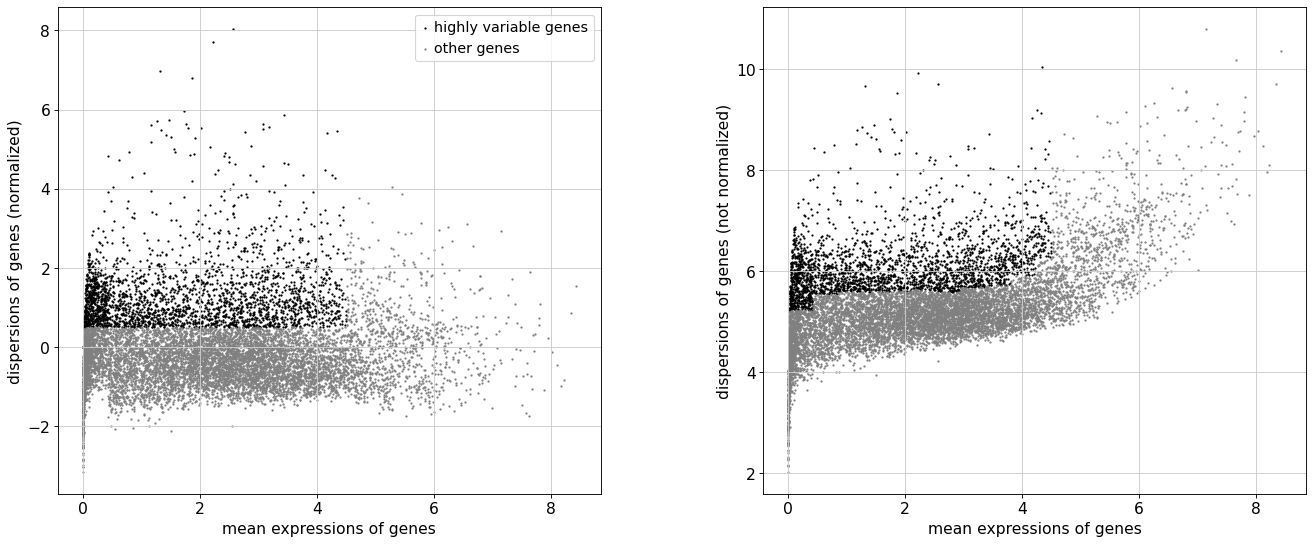

In [66]:
sc.pp.highly_variable_genes(alpha_half_of_cells, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(alpha_half_of_cells)


In [67]:
sc.tl.pca(alpha_half_of_cells, svd_solver='arpack', random_state= 353)
sc.pp.neighbors(alpha_half_of_cells, n_neighbors=10, n_pcs=50, random_state= 678)
sc.tl.umap(alpha_half_of_cells, random_state= 5678)



In [68]:
alpha_half_of_cells.obs['Meta Cluster String'] =alpha_half_of_cells.obs['Meta Cluster'].astype(str)
beta_half_of_cells.obs['Meta Cluster String'] =beta_half_of_cells.obs['Meta Cluster'].astype(str)
single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster String'] =single_cell_arabidopsis_root_4_datasets.obs['Meta Cluster'].astype(str)

Trying to set attribute `.obs` of view, copying.
Trying to set attribute `.obs` of view, copying.


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Meta Cluster String' as categorical


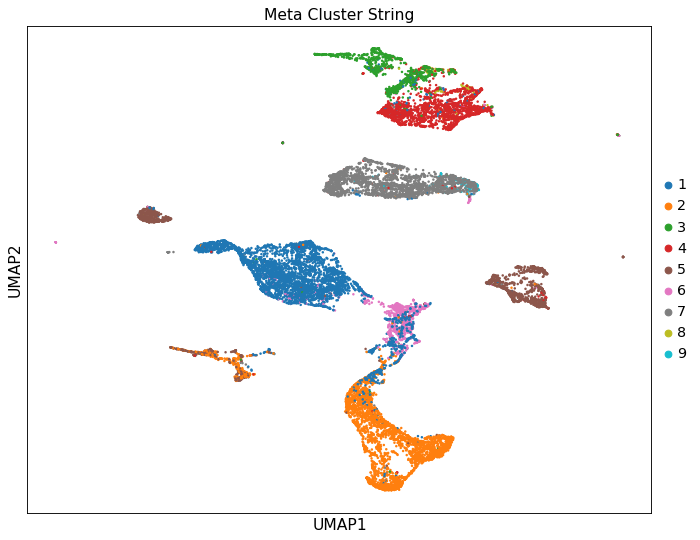

In [69]:
sc.pl.umap(single_cell_arabidopsis_root_4_datasets, color= 'Meta Cluster String', s = 20, palette = 'tab10')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Meta Cluster String' as categorical


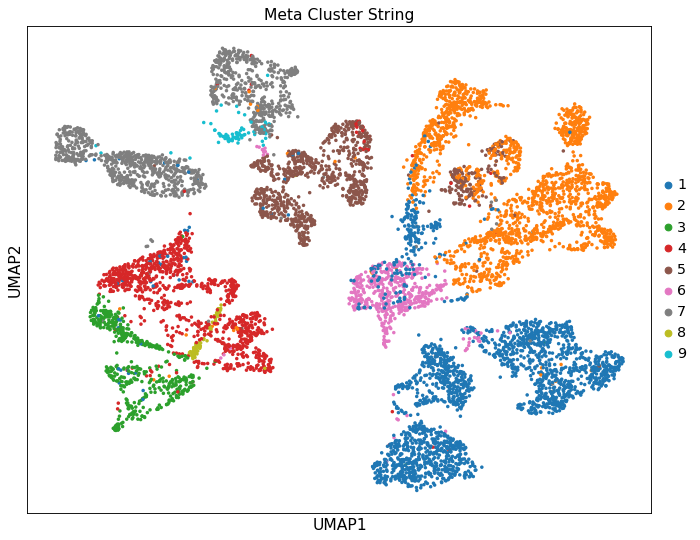

In [70]:
sc.pl.umap(alpha_half_of_cells, color= 'Meta Cluster String', s = 40, palette = 'tab10')

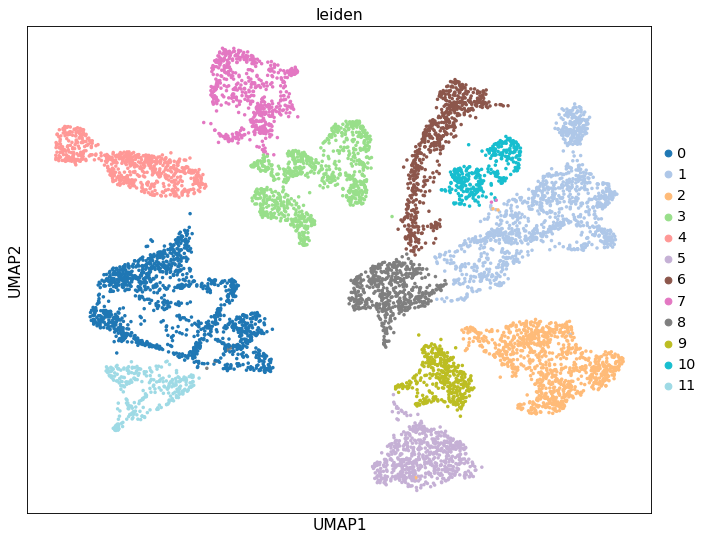

In [71]:
sc.tl.leiden(alpha_half_of_cells, random_state= 112, resolution=.1)

sc.pl.umap(alpha_half_of_cells, color= 'leiden', s = 40, palette = 'tab20')

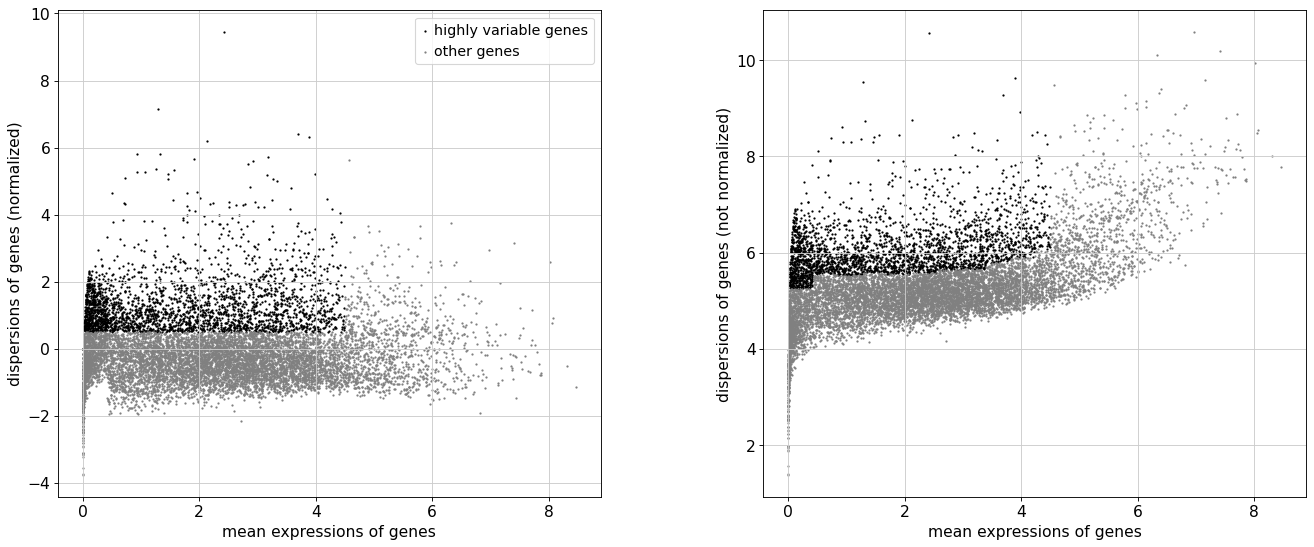

In [72]:
sc.pp.highly_variable_genes(beta_half_of_cells, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

sc.pl.highly_variable_genes(beta_half_of_cells)

In [73]:
sc.tl.pca(beta_half_of_cells, svd_solver='arpack', random_state= 303)
sc.pp.neighbors(beta_half_of_cells, n_neighbors=10, n_pcs=50, random_state= 32)
sc.tl.umap(beta_half_of_cells, random_state= 398)

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Meta Cluster String' as categorical


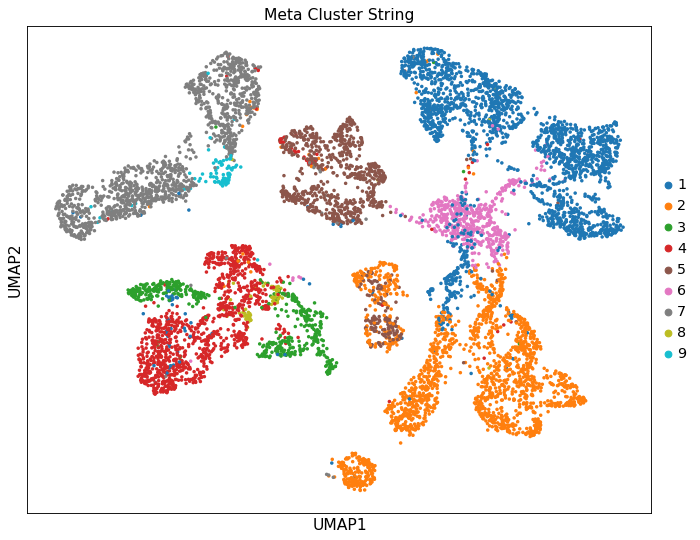

In [74]:
sc.pl.umap(beta_half_of_cells, color= 'Meta Cluster String', s = 40, palette = 'tab10')

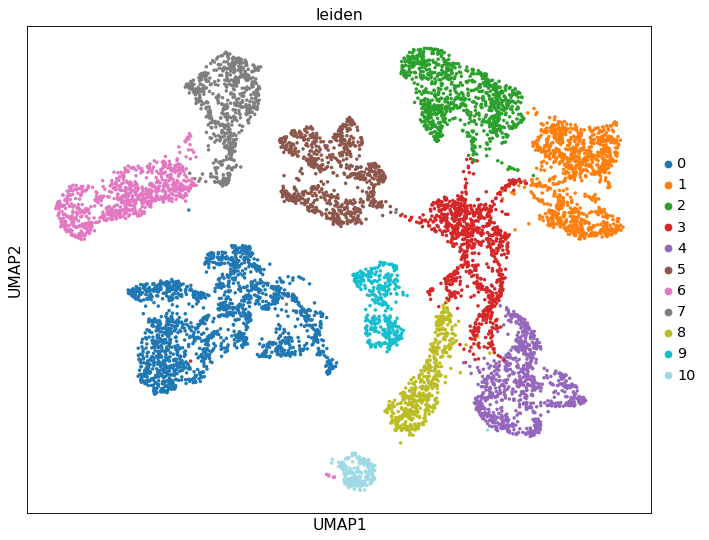

In [75]:
sc.tl.leiden(beta_half_of_cells, resolution= .1, random_state= 404 )

sc.pl.umap(beta_half_of_cells, color= 'leiden', s = 40, palette= 'tab20')

In [76]:
true_pair_dataframe

,Alpha Gene,Beta Gene
0,AT2G15730,AT3G50620
1,AT1G04030,AT5G44040
2,AT4G02500,AT3G62720
3,AT1G14210,AT1G26820
4,AT5G18980,AT3G06210
...,...,...
1887,AT1G32220,AT5G15910
1888,AT1G68140,AT4G08460
1889,AT1G30190,AT2G34610
1890,AT4G10170,AT1G33475


In [77]:
list_of_duplicates = pd.read_csv('/data/passala/Generated_Tables/arabidopsis_gene_duplicate_list.csv')

In [78]:
list_of_duplicates.drop_duplicates(subset = ['Duplicate 1','Duplicate 2'], inplace= True)

In [79]:
analysis_of_duplications = true_pair_dataframe.copy()
analysis_of_duplications

,Alpha Gene,Beta Gene
0,AT2G15730,AT3G50620
1,AT1G04030,AT5G44040
2,AT4G02500,AT3G62720
3,AT1G14210,AT1G26820
4,AT5G18980,AT3G06210
...,...,...
1887,AT1G32220,AT5G15910
1888,AT1G68140,AT4G08460
1889,AT1G30190,AT2G34610
1890,AT4G10170,AT1G33475


In [80]:
analysis_of_duplications = analysis_of_duplications.merge(how = 'left', right = list_of_duplicates, left_on=['Alpha Gene','Beta Gene'], right_on= ['Duplicate 1','Duplicate 2'])

In [81]:
analysis_of_duplications['Mode'].value_counts()

WGD           378
transposed     86
local          52
Name: Mode, dtype: int64

In [82]:
analysis_of_duplications = analysis_of_duplications.merge(how = 'left', right = list_of_duplicates, left_on=['Alpha Gene','Beta Gene'], right_on= ['Duplicate 2','Duplicate 1'])


In [83]:
analysis_of_duplications

,Alpha Gene,Beta Gene,Duplicate 1_x,Duplicate 2_x,Mode_x,Subtype_x,Duplicate 1_y,Duplicate 2_y,Mode_y,Subtype_y
0,AT2G15730,AT3G50620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AT1G04030,AT5G44040,AT1G04030,AT5G44040,WGD,alpha,NaN,NaN,NaN,NaN
2,AT4G02500,AT3G62720,AT4G02500,AT3G62720,WGD,beta,NaN,NaN,NaN,NaN
3,AT1G14210,AT1G26820,AT1G14210,AT1G26820,WGD,beta,NaN,NaN,NaN,NaN
4,AT5G18980,AT3G06210,NaN,NaN,NaN,NaN,AT3G06210,AT5G18980,WGD,alpha
...,...,...,...,...,...,...,...,...,...,...
1887,AT1G32220,AT5G15910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1888,AT1G68140,AT4G08460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1889,AT1G30190,AT2G34610,AT1G30190,AT2G34610,WGD,alpha,NaN,NaN,NaN,NaN
1890,AT4G10170,AT1G33475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [84]:
analysis_of_duplications['Duplication Type'] ='None'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'WGD')| (analysis_of_duplications['Mode_y'] == 'WGD')] = 'WGD'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'transposed')| (analysis_of_duplications['Mode_y'] == 'transposed')] = 'Transposed'
analysis_of_duplications['Duplication Type'].loc[(analysis_of_duplications['Mode_x'] == 'local')| (analysis_of_duplications['Mode_y'] == 'local')] = 'Local'
analysis_of_duplications



,Alpha Gene,Beta Gene,Duplicate 1_x,Duplicate 2_x,Mode_x,Subtype_x,Duplicate 1_y,Duplicate 2_y,Mode_y,Subtype_y,Duplication Type
0,AT2G15730,AT3G50620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1,AT1G04030,AT5G44040,AT1G04030,AT5G44040,WGD,alpha,NaN,NaN,NaN,NaN,WGD
2,AT4G02500,AT3G62720,AT4G02500,AT3G62720,WGD,beta,NaN,NaN,NaN,NaN,WGD
3,AT1G14210,AT1G26820,AT1G14210,AT1G26820,WGD,beta,NaN,NaN,NaN,NaN,WGD
4,AT5G18980,AT3G06210,NaN,NaN,NaN,NaN,AT3G06210,AT5G18980,WGD,alpha,WGD
...,...,...,...,...,...,...,...,...,...,...,...
1887,AT1G32220,AT5G15910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1888,AT1G68140,AT4G08460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None
1889,AT1G30190,AT2G34610,AT1G30190,AT2G34610,WGD,alpha,NaN,NaN,NaN,NaN,WGD
1890,AT4G10170,AT1G33475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None


In [85]:
analysis_of_duplications['Subtype_x'].value_counts()


alpha         290
beta           71
16-107 Mya     55
tandem         45
<16 Mya        31
gamma          17
proximal        7
Name: Subtype_x, dtype: int64

In [86]:
analysis_of_duplications['Subtype'] ='None'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'alpha')| (analysis_of_duplications['Subtype_y'] == 'alpha')] = 'alpha'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'beta')| (analysis_of_duplications['Subtype_y'] == 'beta')] = 'beta'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Subtype_x'] == 'gamma')| (analysis_of_duplications['Subtype_y'] == 'gamma')] = 'gamma'
analysis_of_duplications

,Alpha Gene,Beta Gene,Duplicate 1_x,Duplicate 2_x,Mode_x,Subtype_x,Duplicate 1_y,Duplicate 2_y,Mode_y,Subtype_y,Duplication Type,Subtype
0,AT2G15730,AT3G50620,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1,AT1G04030,AT5G44040,AT1G04030,AT5G44040,WGD,alpha,NaN,NaN,NaN,NaN,WGD,alpha
2,AT4G02500,AT3G62720,AT4G02500,AT3G62720,WGD,beta,NaN,NaN,NaN,NaN,WGD,beta
3,AT1G14210,AT1G26820,AT1G14210,AT1G26820,WGD,beta,NaN,NaN,NaN,NaN,WGD,beta
4,AT5G18980,AT3G06210,NaN,NaN,NaN,NaN,AT3G06210,AT5G18980,WGD,alpha,WGD,alpha
...,...,...,...,...,...,...,...,...,...,...,...,...
1887,AT1G32220,AT5G15910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1888,AT1G68140,AT4G08460,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None
1889,AT1G30190,AT2G34610,AT1G30190,AT2G34610,WGD,alpha,NaN,NaN,NaN,NaN,WGD,alpha
1890,AT4G10170,AT1G33475,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,None


In [87]:
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Mode_x'] == 'transposed')| (analysis_of_duplications['Mode_y'] == 'transposed')] = 'Transposed'
analysis_of_duplications['Subtype'].loc[(analysis_of_duplications['Mode_x'] == 'local')| (analysis_of_duplications['Mode_y'] == 'local')] = 'Local'



In [88]:
analysis_of_duplications= analysis_of_duplications[['Alpha Gene','Beta Gene','Duplication Type','Subtype']]
analysis_of_duplications

,Alpha Gene,Beta Gene,Duplication Type,Subtype
0,AT2G15730,AT3G50620,None,None
1,AT1G04030,AT5G44040,WGD,alpha
2,AT4G02500,AT3G62720,WGD,beta
3,AT1G14210,AT1G26820,WGD,beta
4,AT5G18980,AT3G06210,WGD,alpha
...,...,...,...,...
1887,AT1G32220,AT5G15910,None,None
1888,AT1G68140,AT4G08460,None,None
1889,AT1G30190,AT2G34610,WGD,alpha
1890,AT4G10170,AT1G33475,None,None


Text(0.5, 1.0, 'Breakdown of the ~1900 Gene Pairs Used to realign the Single Cell Data')

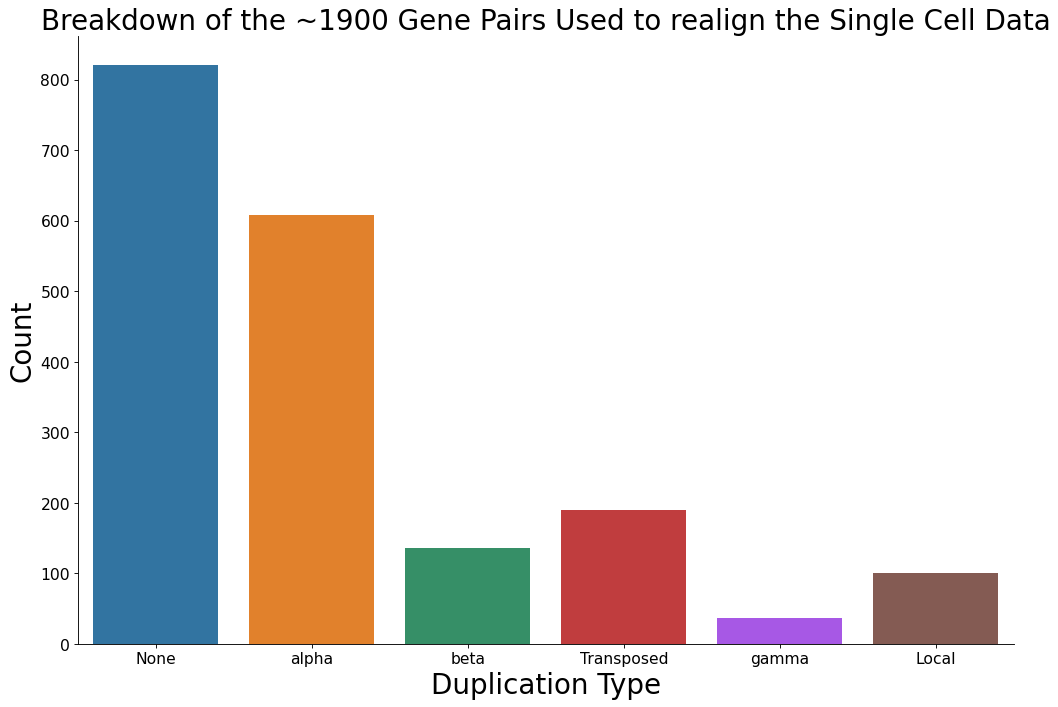

In [89]:
fig, ax = plt.subplots(figsize = (15,10))

ax = sns.countplot(data = analysis_of_duplications,x = 'Subtype', dodge= False)

fig.patch.set_facecolor('white')

sns.despine()
ax.grid(False)
ax.spines["bottom"].set_color("black")
ax.spines["left"].set_color("black")

#plt.xlim(.5,.98)
#plt.ylim(.3,1)
plt.xlabel("Duplication Type", fontsize = 25)
plt.ylabel("Count", fontsize = 25)


plt.title("Breakdown of the ~1900 Gene Pairs Used to realign the Single Cell Data", fontsize = 25)
#plt.xticks(fontsize = 15, rotation = 30)
#plt.yticks(fontsize = 15)
#ax.set_xticklabels(labels = meta_cluster_labels_from_1_to_9)
#plt.legend(fontsize= 14,markerscale = 2.5, title = 'Gene', title_fontsize = 20)
#plt.savefig('/home/passala/Gene_duplication_project/Figures/Function_Investigation_Plots/poster_figure.jpg',dpi = 800)


In [90]:
alpha_half_of_cells.var['Alpha Gene'] = alpha_half_of_cells.var_names
beta_half_of_cells.var['Beta Gene'] = beta_half_of_cells.var_names
#alpha_half_of_cells.var = alpha_half_of_cells.var.merge(how = 'left', on= 'Alpha Gene', right = true_pair_dataframe)


In [91]:
beta_half_of_cells

AnnData object with n_obs × n_vars = 8317 × 11135
    obs: 'Cell Type', 'Study Number', 'Batch Cluster', 'Meta Cluster', 'Meta Cluster String', 'leiden'
    var: 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'Beta Gene'
    uns: 'hvg', 'pca', 'neighbors', 'umap', 'Meta Cluster String_colors', 'leiden', 'leiden_colors'
    obsm: 'X_umap', 'X_pca'
    varm: 'PCs'
    obsp: 'distances', 'connectivities'

In [92]:
temp_var_df = alpha_half_of_cells.var.merge(how = 'left', on= 'Alpha Gene', right = true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Alpha Gene', drop = False)
alpha_half_of_cells.var = temp_var_df

In [93]:
temp_var_df = beta_half_of_cells.var.merge(how = 'left', on= 'Beta Gene', right = true_pair_dataframe)
temp_var_df = temp_var_df.set_index('Beta Gene', drop = False)
beta_half_of_cells.var = temp_var_df

In [94]:
beta_half_of_cells.var.sort_values(by = 'Alpha Gene')

,highly_variable,means,dispersions,dispersions_norm,Beta Gene,Alpha Gene
Beta Gene,,,,,,
AT2G46830,False,3.030260,5.547686,0.280279,AT2G46830,AT1G01060
AT4G00850,False,0.875709,5.206481,-0.058959,AT4G00850,AT1G01160
AT2G46660,False,0.372601,4.625147,-0.191703,AT2G46660,AT1G01190
AT4G16430,False,2.752421,5.046215,-0.566217,AT4G16430,AT1G01260
AT5G06420,True,1.246355,5.662952,0.727023,AT5G06420,AT1G01350
...,...,...,...,...,...,...
ATCG01070,True,1.015029,6.084265,1.452468,ATCG01070,NaN
ATCG01110,True,1.120116,5.799622,0.962350,ATCG01110,NaN
ATCG01120,True,1.645177,6.140377,1.432604,ATCG01120,NaN


In [95]:
alpha_half_of_cells.var.sort_values(by = 'Beta Gene')

,highly_variable,means,dispersions,dispersions_norm,Alpha Gene,Beta Gene
Alpha Gene,,,,,,
AT3G61820,True,3.318204,5.995403,1.082235,AT3G61820,AT1G01300
AT4G01010,False,1.100544,5.564448,0.455012,AT4G01010,AT1G01340
AT4G11330,False,1.568574,5.194240,-0.118344,AT4G11330,AT1G01560
AT4G23490,False,2.281933,5.221738,-0.164167,AT4G23490,AT1G01570
AT4G00400,True,2.513120,5.968630,1.086585,AT4G00400,AT1G01610
...,...,...,...,...,...,...
ATCG01060,False,0.012398,3.697553,-1.238713,ATCG01060,NaN
ATCG01080,True,0.560692,6.680872,2.211752,ATCG01080,NaN
ATCG01090,True,1.633525,6.156569,1.407445,ATCG01090,NaN


In [96]:
alpha_half_of_cells.var.loc[~alpha_half_of_cells.var['Beta Gene'].isnull()].index.to_list()

['AT1G01060',
 'AT1G01160',
 'AT1G01190',
 'AT1G01260',
 'AT1G01350',
 'AT1G01420',
 'AT1G01540',
 'AT1G01720',
 'AT1G01780',
 'AT1G01950',
 'AT1G01960',
 'AT1G02130',
 'AT1G02205',
 'AT1G02360',
 'AT1G02520',
 'AT1G02730',
 'AT1G02816',
 'AT1G02890',
 'AT1G03280',
 'AT1G03590',
 'AT1G03610',
 'AT1G03680',
 'AT1G03730',
 'AT1G03840',
 'AT1G03960',
 'AT1G03990',
 'AT1G04030',
 'AT1G04080',
 'AT1G04140',
 'AT1G04270',
 'AT1G04340',
 'AT1G04520',
 'AT1G04610',
 'AT1G04700',
 'AT1G04820',
 'AT1G04930',
 'AT1G04960',
 'AT1G05010',
 'AT1G05090',
 'AT1G05180',
 'AT1G05230',
 'AT1G05270',
 'AT1G05370',
 'AT1G05380',
 'AT1G05470',
 'AT1G05730',
 'AT1G05830',
 'AT1G05850',
 'AT1G06150',
 'AT1G06640',
 'AT1G06780',
 'AT1G06960',
 'AT1G07030',
 'AT1G07070',
 'AT1G07090',
 'AT1G07140',
 'AT1G07260',
 'AT1G07290',
 'AT1G07480',
 'AT1G07630',
 'AT1G07705',
 'AT1G08125',
 'AT1G08400',
 'AT1G08420',
 'AT1G08540',
 'AT1G08940',
 'AT1G09080',
 'AT1G09100',
 'AT1G09140',
 'AT1G09270',
 'AT1G09410',
 'AT1G

In [97]:
alpha_genes_shared_between_groups = alpha_half_of_cells.var.loc[~alpha_half_of_cells.var['Beta Gene'].isnull()].index.to_list()
beta_genes_shared_between_groups = beta_half_of_cells.var.loc[~beta_half_of_cells.var['Alpha Gene'].isnull()].index.to_list()
alpha_half_of_cells_without_genes = alpha_half_of_cells.copy()
alpha_half_of_cells_without_genes = alpha_half_of_cells_without_genes[:,alpha_genes_shared_between_groups]
beta_half_of_cells_without_genes = beta_half_of_cells.copy()
beta_half_of_cells_without_genes = beta_half_of_cells_without_genes[:,beta_genes_shared_between_groups]


In [98]:
beta_half_of_cells_without_genes.var

,highly_variable,means,dispersions,dispersions_norm,Beta Gene,Alpha Gene
Beta Gene,,,,,,
AT1G01300,False,3.601295,5.239812,-0.419877,AT1G01300,AT3G61820
AT1G01340,False,2.244960,5.431098,0.233872,AT1G01340,AT4G01010
AT1G01560,True,1.246570,5.673592,0.745342,AT1G01560,AT4G11330
AT1G01570,False,2.009685,5.487367,0.377464,AT1G01570,AT4G23490
AT1G01610,True,0.943545,5.813918,0.986966,AT1G01610,AT4G00400
...,...,...,...,...,...,...
AT5G67190,False,3.527977,5.599033,0.187687,AT5G67190,AT1G46768
AT5G67210,True,2.930952,6.295361,1.696051,AT5G67210,AT3G50220
AT5G67410,False,0.673611,4.177405,-1.733848,AT5G67410,AT4G33890


In [99]:
beta_half_of_cells_without_genes.var_names = beta_half_of_cells_without_genes.var['Alpha Gene']
beta_half_of_cells_without_genes.var

,highly_variable,means,dispersions,dispersions_norm,Beta Gene,Alpha Gene
Alpha Gene,,,,,,
AT3G61820,False,3.601295,5.239812,-0.419877,AT1G01300,AT3G61820
AT4G01010,False,2.244960,5.431098,0.233872,AT1G01340,AT4G01010
AT4G11330,True,1.246570,5.673592,0.745342,AT1G01560,AT4G11330
AT4G23490,False,2.009685,5.487367,0.377464,AT1G01570,AT4G23490
AT4G00400,True,0.943545,5.813918,0.986966,AT1G01610,AT4G00400
...,...,...,...,...,...,...
AT1G46768,False,3.527977,5.599033,0.187687,AT5G67190,AT1G46768
AT3G50220,True,2.930952,6.295361,1.696051,AT5G67210,AT3G50220
AT4G33890,False,0.673611,4.177405,-1.733848,AT5G67410,AT4G33890


In [100]:
beta_half_of_cells_without_genes.obs['Set Half'] = 'Beta'
alpha_half_of_cells_without_genes.obs['Set Half'] = 'Alpha'


Trying to set attribute `.obs` of view, copying.


In [101]:
alpha_half_of_cells_without_genes.obs.index = alpha_half_of_cells_without_genes.obs.index.str.decode('utf-8')
beta_half_of_cells_without_genes.obs.index = beta_half_of_cells_without_genes.obs.index.str.decode('utf-8')

In [102]:
alpha_half_of_cells_without_genes.obs

,Cell Type,Study Number,Batch Cluster,Meta Cluster,Meta Cluster String,leiden,Set Half
AAACCTGAGAGTGACC-1,14,1,23,1,1,2,Alpha
AAACCTGAGCGATTCT-1,15,1,25,2,2,1,Alpha
AAACCTGAGGCTCATT-1,15,1,25,2,2,1,Alpha
AAACCTGCAAGTAGTA-1,3,1,4,5,5,3,Alpha
AAACCTGGTTATTCTC-1,14,1,23,1,1,1,Alpha
...,...,...,...,...,...,...,...
WT3_WT3_TTTGTCAGTCTGCGGT,8,3,43,7,7,4,Alpha
WT3_WT3_TTTGTCAGTTCCACTC,12,3,47,5,5,3,Alpha
WT3_WT3_TTTGTCATCCTCCTAG,1,3,41,4,4,0,Alpha
WT3_WT3_TTTGTCATCTCGATGA,10,3,45,2,2,6,Alpha


In [103]:
beta_half_of_cells_without_genes.obs

,Cell Type,Study Number,Batch Cluster,Meta Cluster,Meta Cluster String,leiden,Set Half
AAACCTGAGAAGGTTT-1,10,1,15,8,8,0,Beta
AAACCTGAGGGTGTTG-1,15,1,25,2,2,4,Beta
AAACCTGCAATAGCGG-1,14,1,23,1,1,2,Beta
AAACCTGGTCTGCAAT-1,15,1,25,2,2,4,Beta
AAACCTGGTGTTGAGG-1,8,1,11,7,7,7,Beta
...,...,...,...,...,...,...,...
WT3_WT3_TTTCCTCTCTGGTATG,8,3,43,7,7,6,Beta
WT3_WT3_TTTGCGCAGTGTTTGC,10,3,45,2,2,8,Beta
WT3_WT3_TTTGGTTAGAACTGTA,1,3,41,4,4,0,Beta
WT3_WT3_TTTGGTTCACGCATCG,1,3,41,4,4,0,Beta


In [104]:
#concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)
#concatenated_alpha_beta_database

In [105]:
# Default-  No integration, completely seperate clusters

# sc.pp.highly_variable_genes(concatenated_alpha_beta_database, min_mean=0.0125, max_mean=4.5, min_disp=0.5)

# sc.pl.highly_variable_genes(concatenated_alpha_beta_database)
# sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', random_state= 219)
# sc.pp.neighbors(concatenated_alpha_beta_database, n_neighbors=10, n_pcs=50, random_state= 45)
# sc.tl.umap(concatenated_alpha_beta_database, random_state= 912)
# sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s = 40,)

In [106]:
## BBKNN - Ok Integration, still a big blob
# import bbknn
# bbknn.bbknn(adata = concatenated_alpha_beta_database, batch_key= 'Set Half')
# sc.tl.umap(concatenated_alpha_beta_database, random_state= 202)
# sc.pl.umap(concatenated_alpha_beta_database, color= 'Meta Cluster String', s = 30,)

[[0.      0.65761]
 [0.      0.     ]]
Processing datasets Alpha <=> Beta


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/sklearn/manifold/_spectral_embedding.py:260: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'leiden' as categorical
/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), i

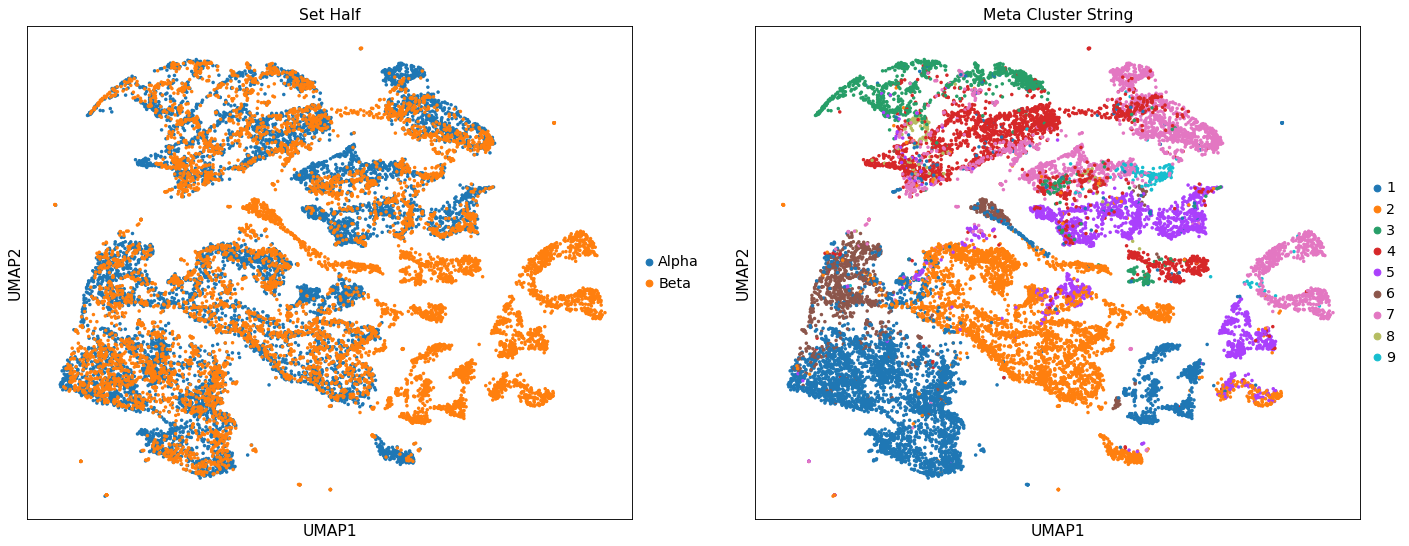

In [107]:
## Scanorama Just Integrate, kinda works but not all clusters well integrated
import scanorama
concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)
#sc.tl.pca(concatenated_alpha_beta_database, svd_solver='arpack', )

sc.external.pp.scanorama_integrate(concatenated_alpha_beta_database,'Set Half')
sc.pp.neighbors(concatenated_alpha_beta_database, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
sc.tl.umap(concatenated_alpha_beta_database, random_state= 243)
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s = 40,)


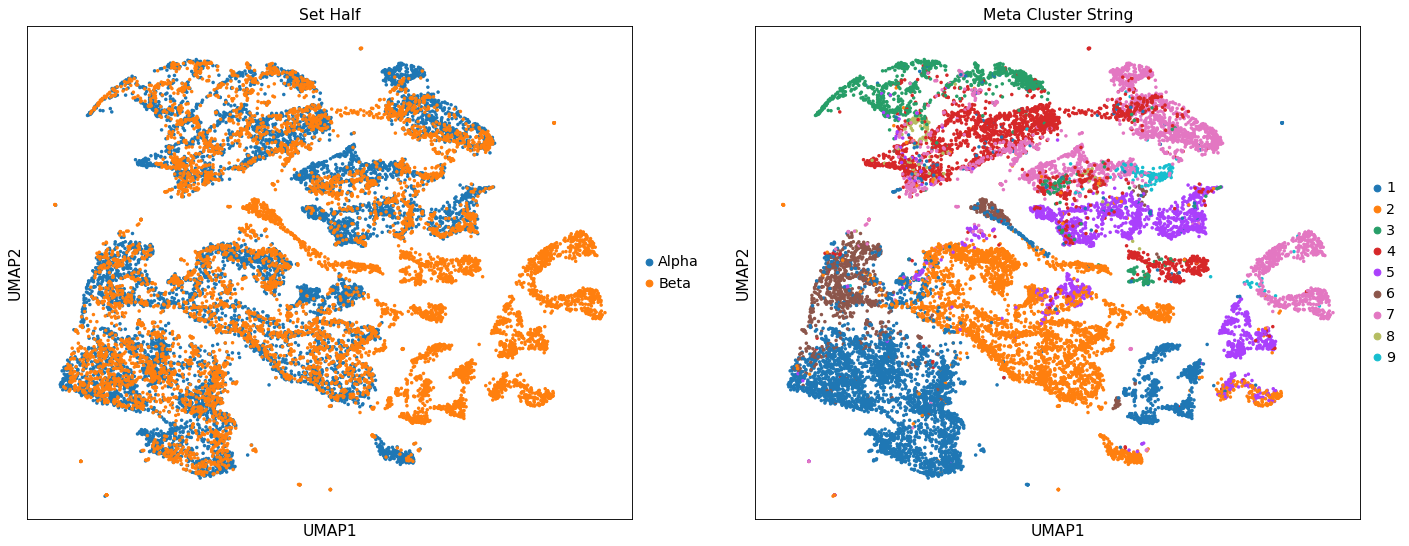

In [108]:
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s = 40)

In [109]:
# Scanorama Integrate and Correct,Doesn't Work at all
# import scanorama
# corrected = scanorama.correct_scanpy([alpha_half_of_cells_without_genes,beta_half_of_cells_without_genes], return_dimred=True)
# corrected_scanorama = corrected[0].concatenate(corrected[1])
# sc.pp.neighbors(corrected_scanorama, n_neighbors = 10, n_pcs = 40, use_rep= 'X_scanorama', random_state = 2204)
# sc.tl.umap(corrected_scanorama, random_state= 243)
# sc.pl.umap(corrected_scanorama, color= ['Set Half', 'Meta Cluster String'], s = 40,)

#sc.pl.umap(corrected_scanorama, color= 'Meta Cluster String', s = 30,)

In [110]:
### MNN Method- Doens't Work
# import mnnpy
# order_of_vars = alpha_half_of_cells_without_genes.var.index.to_list()
# current_order_beta_vars = beta_half_of_cells_without_genes.var_names
# panda_version_of_beta_x_data = pd.DataFrame(columns = current_order_beta_vars, data = beta_half_of_cells_without_genes.X)

# re_ordered_version = panda_version_of_beta_x_data.reindex(columns = order_of_vars)
# beta_half_of_cells_without_genes.X = re_ordered_version
# beta_half_of_cells_without_genes.var = beta_half_of_cells_without_genes.var.reindex(order_of_vars)

# hvgs = list(set(beta_half_of_cells_without_genes.var.loc[beta_half_of_cells_without_genes.var['highly_variable']==True].index.to_list()+alpha_half_of_cells_without_genes.var.loc[alpha_half_of_cells_without_genes.var['highly_variable']==True].index.to_list()))


# mnn_corrected_database = mnnpy.mnn_correct(alpha_half_of_cells_without_genes,beta_half_of_cells_without_genes,do_concatenate= True, batch_categories= ['Alpha','Beta'], var_subset= hvgs)
# # mnn_corrected_database
# mnn_anndata_corrected = mnn_corrected_database[0]
# mnn_anndata_corrected = mnn_anndata_corrected[:,hvgs]

# sc.tl.pca(mnn_anndata_corrected, svd_solver='arpack', random_state= 219, use_highly_variable= False)
# sc.pp.neighbors(mnn_anndata_corrected, n_neighbors=10, n_pcs=50, random_state= 45)
# sc.tl.umap(mnn_anndata_corrected, random_state= 912)
# sc.pl.umap(mnn_anndata_corrected, color= ['Set Half', 'Meta Cluster String'], s = 40,)


In [111]:
## Scanpy Ingest 
order_of_vars = alpha_half_of_cells_without_genes.var.index.to_list()
current_order_beta_vars = beta_half_of_cells_without_genes.var_names
panda_version_of_beta_x_data = pd.DataFrame(columns = current_order_beta_vars, data = beta_half_of_cells_without_genes.X)

re_ordered_version = panda_version_of_beta_x_data.reindex(columns = order_of_vars)
beta_half_of_cells_without_genes.X = re_ordered_version
beta_half_of_cells_without_genes.var = beta_half_of_cells_without_genes.var.reindex(order_of_vars)

sc.tl.ingest(adata = beta_half_of_cells_without_genes, adata_ref = alpha_half_of_cells_without_genes, obs = 'leiden')
beta_half_of_cells_without_genes.uns['leiden_colors'] = alpha_half_of_cells_without_genes.uns['leiden_colors']  # fix colors

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Set Half' as categorical


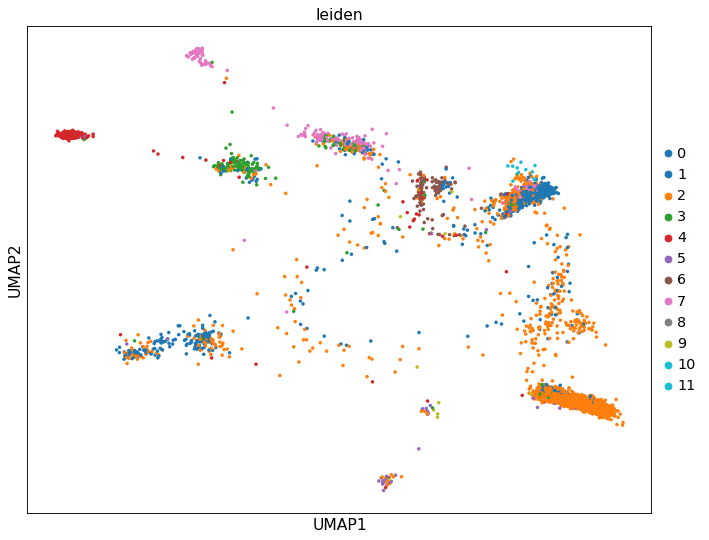

In [112]:
sc.pl.umap(beta_half_of_cells_without_genes, color='leiden', wspace=0.5, s = 40, palette= 'tab10')

/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Set Half' as categorical


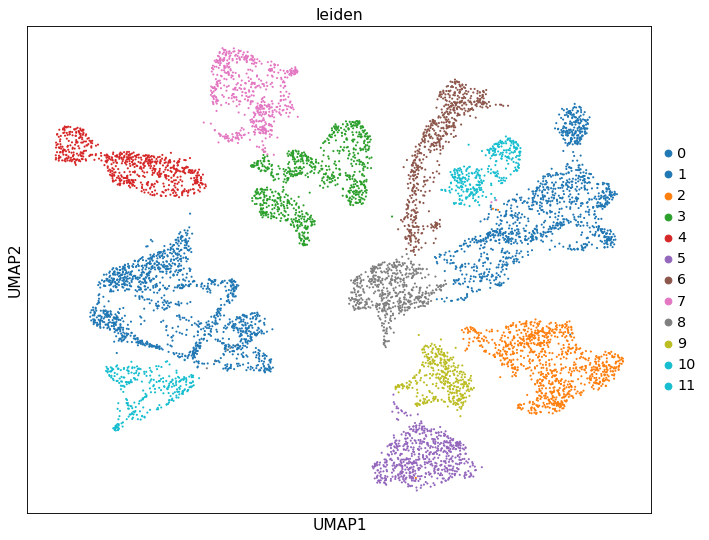

In [113]:
sc.pl.umap(alpha_half_of_cells_without_genes, color = 'leiden', palette = 'tab10')

In [114]:
concatenated_alpha_beta_database = alpha_half_of_cells_without_genes.concatenate(beta_half_of_cells_without_genes)


/home/passala/miniconda3/envs/py39/lib/python3.9/site-packages/anndata-0.7.6-py3.9.egg/anndata/_core/anndata.py:1220: FutureWarning: The `inplace` parameter in pandas.Categorical.reorder_categories is deprecated and will be removed in a future version. Reordering categories will always return a new Categorical object.
  c.reorder_categories(natsorted(c.categories), inplace=True)
... storing 'Set Half' as categorical


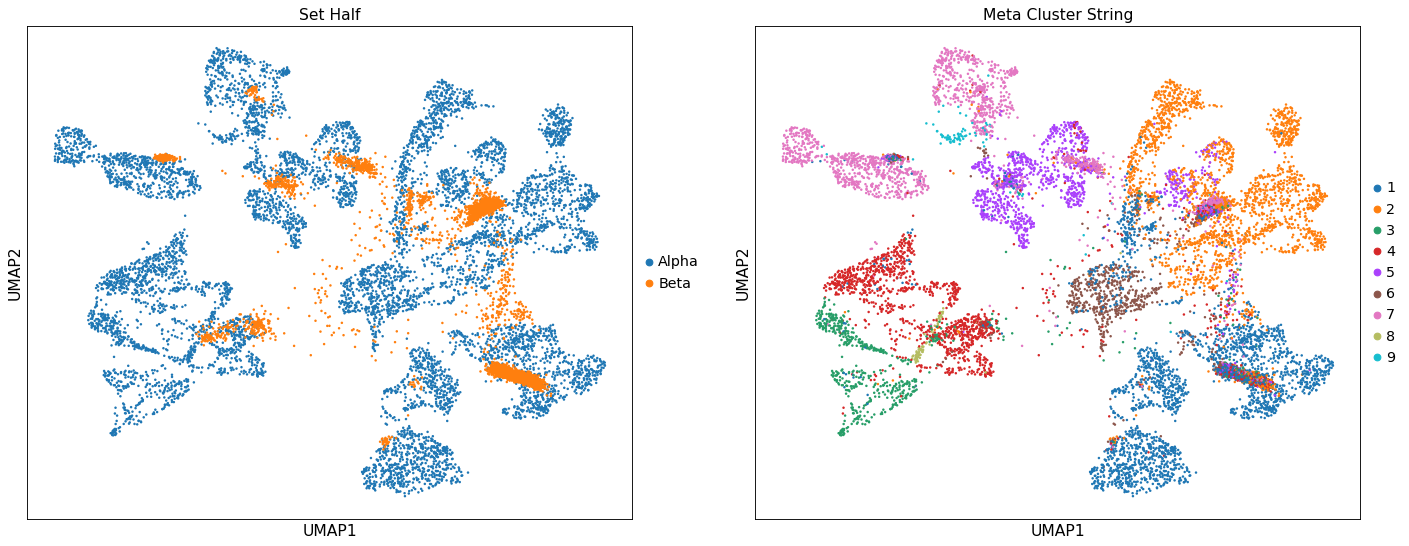

In [115]:
sc.pl.umap(concatenated_alpha_beta_database, color= ['Set Half', 'Meta Cluster String'], s= 20,)


In [116]:

sc.tl.ingest(adata = alpha_half_of_cells_without_genes, adata_ref = beta_half_of_cells_without_genes, obs = 'leiden')
alpha_half_of_cells_without_genes.uns['leiden_colors'] = beta_half_of_cells_without_genes.uns['leiden_colors']  # fix colors

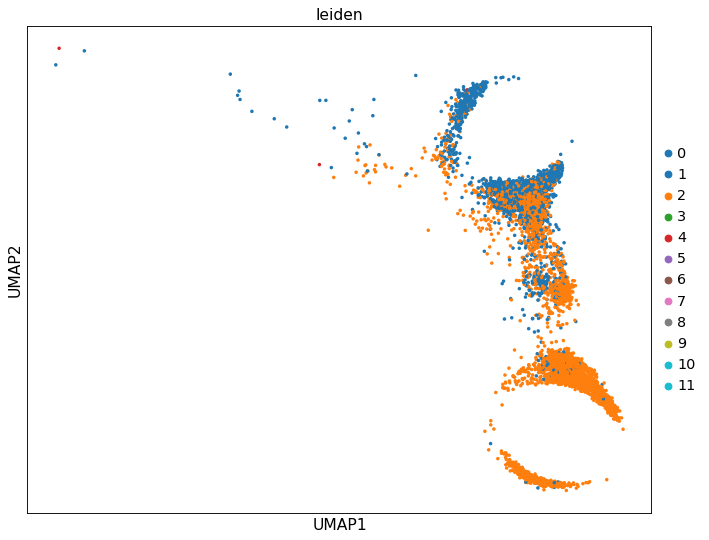

In [117]:
sc.pl.umap(alpha_half_of_cells_without_genes, color='leiden', wspace=0.5, s = 40, palette= 'tab10')